In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder


In [2]:
file_path = "./dataset.csv"
data_df = pd.read_csv(file_path, index_col="id")
data_df.head()


,Telcos,Mobile,Gender,Age,Region,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
id,,,,,,,,,,,,,,,,,
2245,Smart,xxxxxxxxxx,Male,50,Dar es Salaam,37,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
2246,Smart,xxxxxxxxxx,Male,92,Geita,36,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes
2247,Smart,xxxxxxxxxx,Female,14,Arusha,63,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes
2248,Zantel,xxxxxxxxxx,Female,16,Dar es Salaam,6,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes
2249,Smart,xxxxxxxxxx,Female,59,Iringa,27,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes


Size of dataset

In [3]:
data_shape = data_df.shape
data_shape


(5434, 17)

In [4]:
data_size = data_df.size
data_size


92378

DataTypes of columns

In [5]:
data_type = data_df.dtypes
data_type


Telcos                                     object
Mobile                                     object
Gender                                     object
Age                                         int64
Region                                     object
District                                    int64
Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Hyper Tension                              object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
COVID-19                                   object
dtype: object

Max and min

In [6]:
data_df.agg(["max", "min", "count"])


,Telcos,Mobile,Gender,Age,Region,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
max,tiGo,xxxxxxxxxx,Male,111,Katavi,77,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
min,Airtel,xxxxxxxxxx,Female,1,Arusha,1,No,No,No,No,No,No,No,No,No,No,No
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434


In [7]:
data_df.describe().loc[["count", "min", "max"]]


,Age,District
count,5434.0,5434.0
min,1.0,1.0
max,111.0,77.0


Skewness

In [8]:
data_df.skew(numeric_only=True)


Age         0.018925
District    0.010505
dtype: float64

Count null value in every column of DataFrame

In [9]:
data_df.isna().sum()


Telcos                                     0
Mobile                                     0
Gender                                     0
Age                                        0
Region                                     0
District                                   0
Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Hyper Tension                              0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
COVID-19                                   0
dtype: int64

#### Bar plot to find how many suffer from covid-19
Bar plot for finding number of people suffering from covid or not

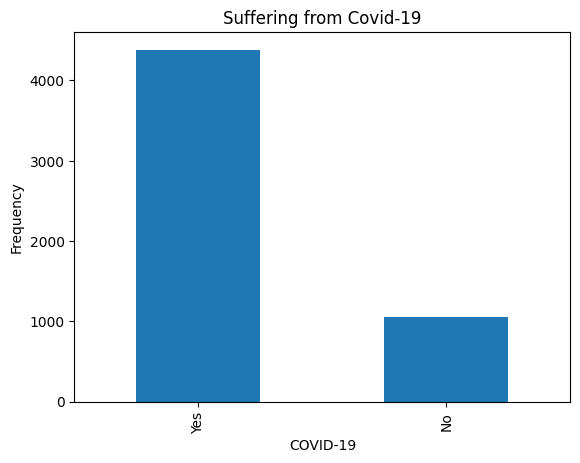

In [10]:
data_df["COVID-19"].value_counts().plot(kind="bar")
plt.xlabel("COVID-19")
plt.ylabel("Frequency")
plt.title("Suffering from Covid-19")
plt.show()


#### Which Age is in danger of Covid-19 ?
Finding which age of people suffer from covid

In [11]:
most_danger_age = (
    (data_df[data_df["COVID-19"] == "Yes"])["Age"].value_counts().to_frame()
)


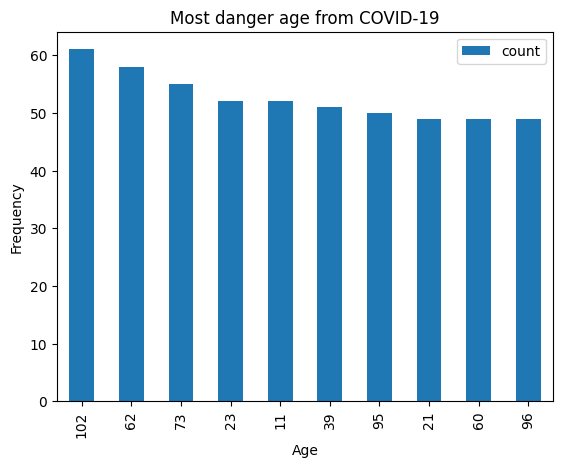

In [12]:
most_danger_age.head(10).plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Most danger age from COVID-19")
plt.show()


People 102 years old suffer from covid most

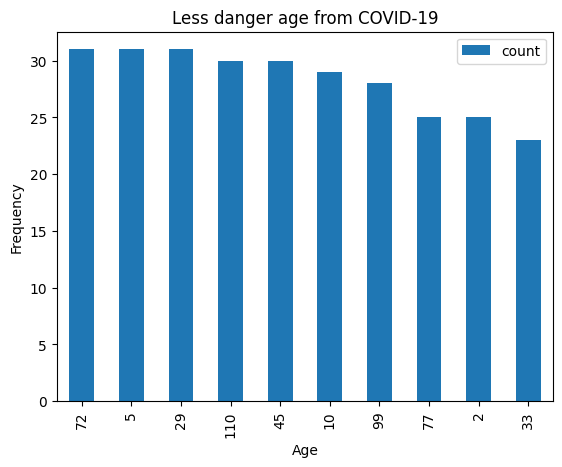

In [13]:
most_danger_age.tail(10).plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Less danger age from COVID-19")
plt.show()


People 33 years old suffer from covid less

What percentage of people with fever are suspected to have Covid-19 ?

In [14]:
female_with_fever = list(
    data_df[(data_df["Gender"] == "Female") & (data_df["Fever"] == "Yes")]["COVID-19"]
)
percentage_fe = {
    x: female_with_fever.count(x) / len(female_with_fever) * 100
    for x in female_with_fever
}
percentage_fe


{'Yes': 87.48815165876778, 'No': 12.511848341232227}

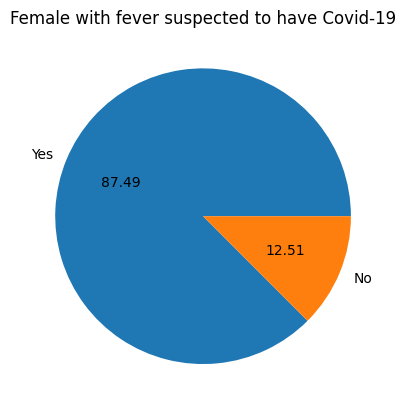

In [15]:
plt.pie(percentage_fe.values(), labels=percentage_fe.keys(), autopct="%.2f")
plt.title("Female with fever suspected to have Covid-19")
plt.show()


88.35 % of females "with fever" have covid suspect

In [16]:
male_with_fever = list(
    data_df[(data_df["Gender"] == "Male") & (data_df["Fever"] == "Yes")]["COVID-19"]
)


In [17]:
percentage = {
    x: male_with_fever.count(x) / len(male_with_fever) * 100 for x in male_with_fever
}
percentage


{'Yes': 88.3495145631068, 'No': 11.650485436893204}

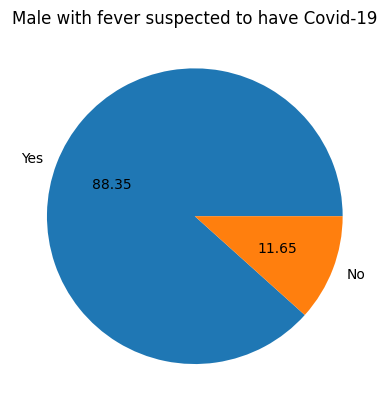

In [18]:
plt.pie(percentage.values(), labels=percentage.keys(), autopct="%.2f")
plt.title("Male with fever suspected to have Covid-19")
plt.show()


88.35 % of males "with fever" have covid suspect

In [19]:
people_with_fever = data_df[(data_df["Fever"] == "Yes")][["Gender", "COVID-19"]]
people_with_fever


,Gender,COVID-19
id,,
2245,Male,Yes
2246,Male,Yes
2247,Female,Yes
2248,Female,Yes
2249,Female,Yes
...,...,...
7674,Female,Yes
7675,Male,Yes
7676,Female,No


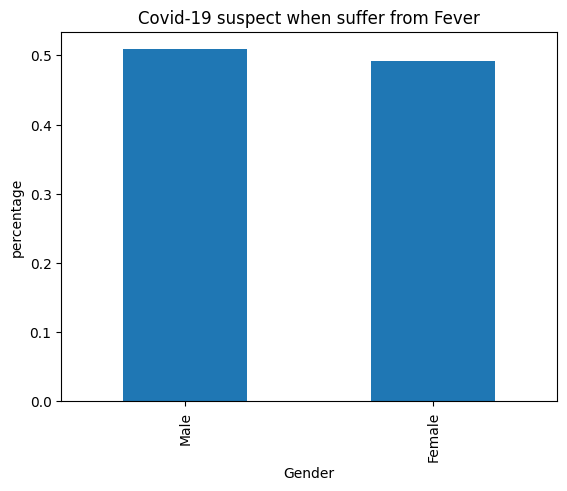

Gender
Male      1911
Female    1846
Name: count, dtype: int64


In [20]:
people_with_fever = data_df[
    (data_df["Fever"] == "Yes") & (data_df["COVID-19"] == "Yes")
][["Gender", "COVID-19"]]
people_with_fever["Gender"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("percentage")
plt.title("Covid-19 suspect when suffer from Fever")
plt.show()
print(people_with_fever["Gender"].value_counts())


Males "with fever" suspect covid more than females "with fever"

Which region has highest and lowest Covid-19 suspect ?

In [21]:
region = (
    data_df[["Region", "COVID-19"]]
    .value_counts()
    .to_frame(name="Count")
    .reset_index(level=["COVID-19"])
)


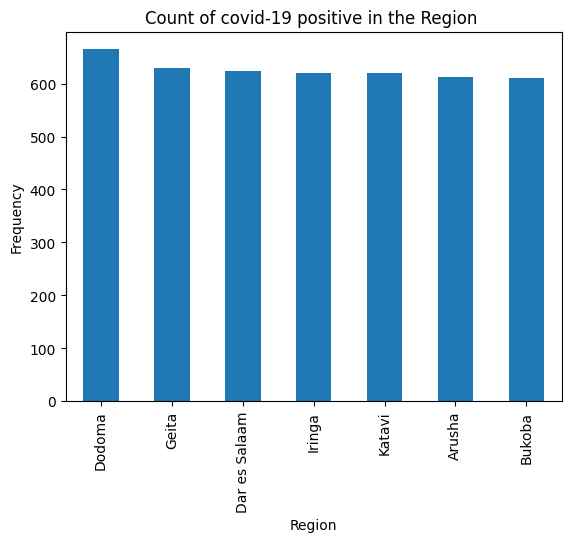

In [22]:
region[region["COVID-19"] == "Yes"]["Count"].plot(kind="bar")
plt.ylabel("Frequency")
plt.title("Count of covid-19 positive in the Region ")
plt.show()


Dodoma region suspect more covid case where Bukoda region suspect less

#### People Contact with COVID Patient

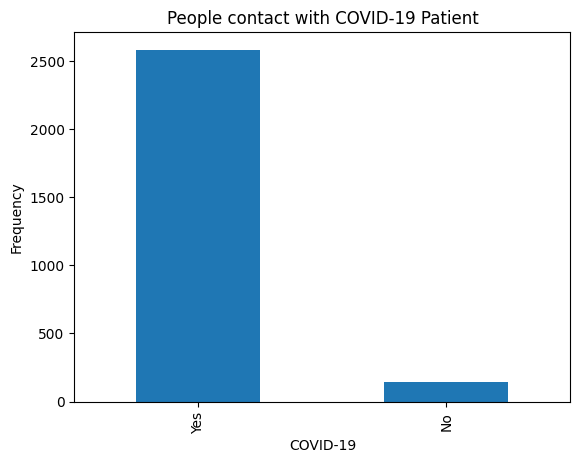

COVID-19
Yes    2582
No      144
Name: count, dtype: int64


In [23]:
data_df[data_df["Contact with COVID Patient"] == "Yes"]["COVID-19"].value_counts().plot(
    kind="bar"
)
plt.xlabel("COVID-19")
plt.ylabel("Frequency")
plt.title("People contact with COVID-19 Patient")
plt.show()
print(
    data_df[data_df["Contact with COVID Patient"] == "Yes"]["COVID-19"].value_counts()
)


People who contact with Covid Patients have more chances to suffer from Covid.

#### People who attended Large Gathering

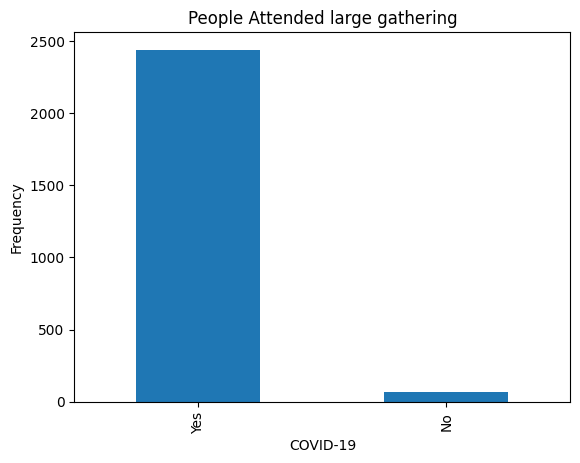

COVID-19
Yes    2442
No       68
Name: count, dtype: int64


In [24]:
data_df[data_df["Attended Large Gathering"] == "Yes"]["COVID-19"].value_counts().plot(
    kind="bar"
)
plt.xlabel("COVID-19")
plt.ylabel("Frequency")
plt.title("People Attended large gathering")
plt.show()
print(data_df[data_df["Attended Large Gathering"] == "Yes"]["COVID-19"].value_counts())


#### Bar Chart covid case for different age group

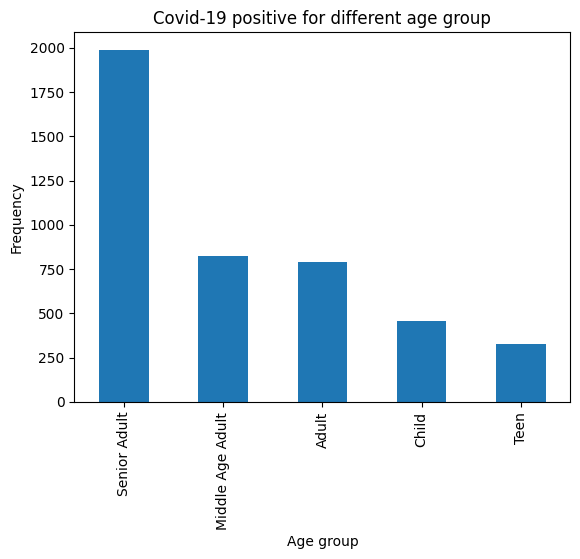

In [25]:
pd.cut(
    data_df[data_df["COVID-19"] == "Yes"]["Age"],
    bins=[0, 12, 20, 40, 60, 130],
    labels=["Child", "Teen", "Adult", "Middle Age Adult", "Senior Adult"],
).value_counts().plot(kind="bar")
plt.xlabel("Age group")
plt.ylabel("Frequency")
plt.title("Covid-19 positive for different age group")
plt.show()


People 60 years old or more suspect from covid-19 most

#### add column as 'Age group' in dataframe.


In [26]:
conditions = [
    data_df["Age"] <= 12,
    (data_df["Age"] >= 13) & (data_df["Age"] <= 19),
    (data_df["Age"] >= 20) & (data_df["Age"] <= 39),
    (data_df["Age"] >= 40) & (data_df["Age"] <= 59),
    data_df["Age"] >= 60,
]

values = ["Child", "Teen", "Adult", "Middle Age Adult", "Senior Adult"]

data_df["Age group"] = np.select(conditions, values)


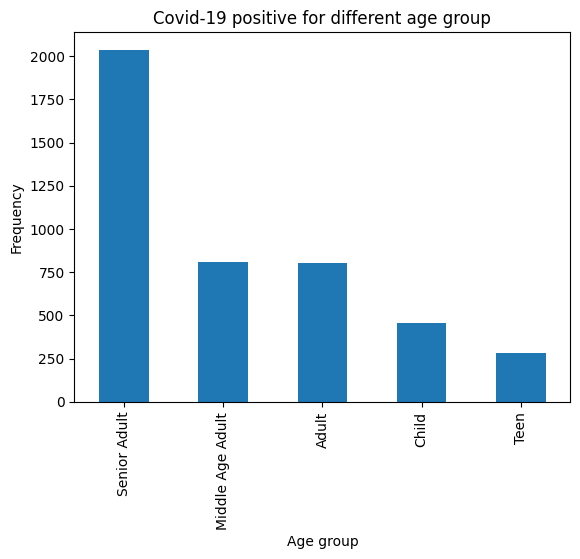

In [27]:
data_df[data_df["COVID-19"] == "Yes"]["Age group"].value_counts().plot(kind="bar")
plt.xlabel("Age group")
plt.ylabel("Frequency")
plt.title("Covid-19 positive for different age group")
plt.show()


People 60 years old or more suspect from covid-19 most

#### Make categorical data as category datatype.

In [28]:
for column in data_df.columns:
    # less then 10 unique value in column change to category datatype
    if data_df[column].nunique() < 10:
        data_df[column] = data_df[column].astype("category")


Making Column which have unique value number less then 10 as category datatype.

make non categorical data as string

In [29]:
data_df["Telcos"] = data_df["Telcos"].astype("str")
data_df["Mobile"] = data_df["Mobile"].astype("str")
data_df["Region"] = data_df["Region"].astype("str")


In [30]:
data_df.dtypes


Telcos                                       object
Mobile                                       object
Gender                                     category
Age                                           int64
Region                                       object
District                                      int64
Breathing Problem                          category
Fever                                      category
Dry Cough                                  category
Sore throat                                category
Hyper Tension                              category
Abroad travel                              category
Contact with COVID Patient                 category
Attended Large Gathering                   category
Visited Public Exposed Places              category
Family working in Public Exposed Places    category
COVID-19                                   category
Age group                                  category
dtype: object

#### Box plot of numeric data

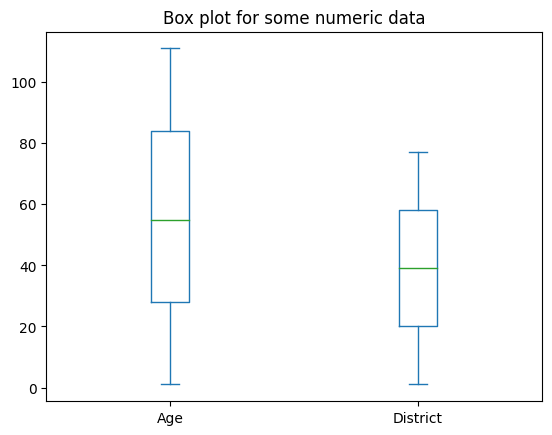

In [31]:
data_df.plot(kind="box")
plt.title("Box plot for some numeric data")
plt.show()


Box plot to view outliers and in age and District column has no outliers.

#### Encode category data

In [32]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(data_df.drop(columns=["COVID-19", "Telcos", "Mobile", "Age"]))
data = ohe.transform(data_df.drop(columns=["COVID-19", "Telcos", "Mobile", "Age"]))


In [33]:
print(data.shape)
data.head()


(5434, 35)


,Gender_Male,Gender_Female,Region_Dar es Salaam,Region_Geita,Region_Arusha,Region_Iringa,Region_Katavi,Region_Bukoba,Region_Dodoma,District,...,Attended Large Gathering_Yes,Visited Public Exposed Places_Yes,Visited Public Exposed Places_No,Family working in Public Exposed Places_Yes,Family working in Public Exposed Places_No,Age group_Middle Age Adult,Age group_Senior Adult,Age group_Teen,Age group_Adult,Age group_Child
id,,,,,,,,,,,,,,,,,,,,,
2245,1,0,1,0,0,0,0,0,0,37,...,0,1,0,1,0,1,0,0,0,0
2246,1,0,0,1,0,0,0,0,0,36,...,1,1,0,0,1,0,1,0,0,0
2247,0,1,0,0,1,0,0,0,0,63,...,0,0,1,0,1,0,0,1,0,0
2248,0,1,1,0,0,0,0,0,0,6,...,1,1,0,0,1,0,0,1,0,0
2249,0,1,0,0,0,1,0,0,0,27,...,0,1,0,0,1,1,0,0,0,0


In [34]:
target = data_df["COVID-19"]
target


id
2245    Yes
2246    Yes
2247    Yes
2248    Yes
2249    Yes
       ... 
7674    Yes
7675    Yes
7676     No
7677     No
7678     No
Name: COVID-19, Length: 5434, dtype: category
Categories (2, object): ['No', 'Yes']

In [35]:
data_df.head()


,Telcos,Mobile,Gender,Age,Region,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19,Age group
id,,,,,,,,,,,,,,,,,,
2245,Smart,xxxxxxxxxx,Male,50,Dar es Salaam,37,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Middle Age Adult
2246,Smart,xxxxxxxxxx,Male,92,Geita,36,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Senior Adult
2247,Smart,xxxxxxxxxx,Female,14,Arusha,63,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Teen
2248,Zantel,xxxxxxxxxx,Female,16,Dar es Salaam,6,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,Teen
2249,Smart,xxxxxxxxxx,Female,59,Iringa,27,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Middle Age Adult


In [36]:
category_column = (
    data_df.drop(columns=["Age group", "Gender"])
    .select_dtypes(include=["category"])
    .columns
)


In [37]:
data_df = data_df.replace({"Yes": 1, "No": 0})
data_df[category_column] = data_df[category_column].apply(pd.to_numeric)


In [38]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5434 entries, 2245 to 7678
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Telcos                                   5434 non-null   object  
 1   Mobile                                   5434 non-null   object  
 2   Gender                                   5434 non-null   category
 3   Age                                      5434 non-null   int64   
 4   Region                                   5434 non-null   object  
 5   District                                 5434 non-null   int64   
 6   Breathing Problem                        5434 non-null   int64   
 7   Fever                                    5434 non-null   int64   
 8   Dry Cough                                5434 non-null   int64   
 9   Sore throat                              5434 non-null   int64   
 10  Hyper Tension                         

In [39]:
data_df.corr(numeric_only=True)


,Age,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Age,1.000000,0.008965,0.007455,0.005515,-0.002095,0.011962,0.004184,-0.017031,0.003297,-0.002489,-0.014040,-0.003852,0.000092
District,0.008965,1.000000,0.015125,0.001389,0.014505,0.004425,0.001074,0.002086,0.007224,0.024643,0.014712,-0.004714,-0.006013
Breathing Problem,0.007455,0.015125,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.005515,0.001389,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,-0.002095,0.014505,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.011962,0.004425,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.004184,0.001074,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,-0.017031,0.002086,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.003297,0.007224,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,-0.002489,0.024643,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145


In [40]:
data_df["Age group"] = data_df["Age group"].astype("str")


In [41]:
columns = data_df.drop(columns="Gender").select_dtypes(include="category").columns
for column in columns:
    data_df[column] = data_df[column].astype("int")


In [42]:
corr = data_df.corr(numeric_only=True)


In [43]:
corr


,Age,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Age,1.000000,0.008965,0.007455,0.005515,-0.002095,0.011962,0.004184,-0.017031,0.003297,-0.002489,-0.014040,-0.003852,0.000092
District,0.008965,1.000000,0.015125,0.001389,0.014505,0.004425,0.001074,0.002086,0.007224,0.024643,0.014712,-0.004714,-0.006013
Breathing Problem,0.007455,0.015125,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.005515,0.001389,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,-0.002095,0.014505,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.011962,0.004425,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.004184,0.001074,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,-0.017031,0.002086,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.003297,0.007224,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,-0.002489,0.024643,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
